# Interpolación

*Interpolación* es el proceso de encontrar una expresión (en muchos casos un polinomio) con un conjunto de puntos $(x, y)$ que pasan por este polinomio.

### Ejemplo
Buscamos el polinomio
$$ p(x) = a_0 + a_1 x + a_2 x^2 $$
donde tengamos algunos puntos dados
$$ p(x_i) = y_i, \qquad i = 1, 2, 3 $$
Que aproximan a la función $\sin(x)$

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import *

In [ ]:
X1 = (0, pi/4, pi/2)
Y1 = (sin(0), sin(pi/4), sin(pi/2))
pd.DataFrame([X1, Y1], index=["x", "y"]) #DataFrame es para hacer una tabla

,0,1,2
x,0.0,0.785398,1.570796
y,0.0,0.707107,1.000000


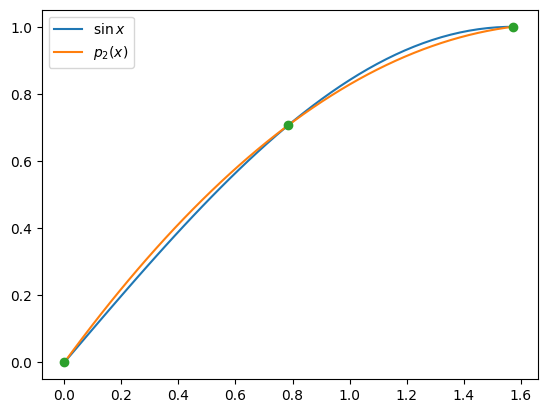

In [ ]:
from sympy import *
from sympy.abc import x, epsilon, alpha

p1 = interpolating_poly(3, x, X1, Y1) #funcion de SymPy que interpola un polinomio
p1n = lambdify(x, p1) #lambdify=(args, expr) convertimos en numerico una función simbolica
#def p1n (f):
#    return numerico
x1r = np.linspace(0, 1.58)
plt.plot(x1r, np.sin(x1r), label = "$\sin x$")
plt.plot(x1r, p1n(x1r), label="$p_2(x)$")
plt.plot([N(x) for x in X1], [N(x) for x in Y1], 'o')
plt.legend();

## Propósitos de la interpolación

1. Reemplazar un conjunto de puntos ${(x_i, y_i)}$ por una función cerrada.
2. Aproximar una función por otra, más sencilla. Típicamente se usan polinomios o polinomios a trozos (piecewise polinomials)

Propósito #1 tiene varios aspectos:

- Los datos pueden ser generadas por una clase de función específica. Por ejemplo:
  $$ p(x) = a_0 + a_1 e^x + a_2 e^{2x} + \dots + a_n e^{n x}$$
  En este caso hay que encontrar a los coeficientes ${a_j}$.

- Tenemos los valores de la función $f(x)$ tabulados. Queremos evaluar $f(x)$ para un $x$ desconocido.

  Por ejemplo. tenemos una tabla de logaritmos y queremos el logaritmo para un $x$ no en dado.
  
- Dado un conjunto de puntos ${(x_i, y_i)}$, queremos una curva que pasa por los puntos. Eso ocurre, por ejemplo, cuando gráficamos funciones.
  Usar líneas rectas genera esquinas, nos gusta más tener una funciones diferenciable en todos los puntos.

El propósito #2 es aproximar una función $f(x)$ para una función más sencilla. Eso puede ayudar para encontrar la derivada o la integral de $f(x)$.

Por ejemplo: la evaluación de
$$ I = \int_0^1 \frac{d x}{1 + x^{10}} $$
no es fácil en forma cerrada. Veremos como es posible resolverlo con la integración de polinomios interpolantes.

# Interpolación de Lagrange

Interpolaremos un polinomio de orden $n$, tal que encontremos el polinomio $P_n(x)$ con $ \deg(P_n) \leq n$, tal que:
$$ P_n(x_i) = y_i, \qquad i = 0, 1, \dots, n $$
con los nodos
$$ (x_0, y_0), (x_1, y_1), \dots, (x_n, y_n)$$
La solución esta proporcionada por la *formula de Lagrange* (publicado en 1795).
$$ P_n(x) = y_0 L_0(x) + y_1 L_1(x) + \dots + y_n L_n(x) $$
Los funciones base de Lagrange son
$$ L_k(x) = \frac{(x - x_0) \dots (x - x_{k-1})(x - x_{k+1}) \dots (x - x_n)}{(x_k - x_0) \dots (x_k - x_{k-1})(x - x_{k+1}) \dots (x_k - x_n)}$$
para $k = 1, 2, \dots, n$.

En la expresión
$$ L_k(x) = \frac{(x - x_0) \dots (x - x_{k-1})(x - x_{k+1}) \dots (x - x_n)}{(x_k - x_0) \dots (x_k - x_{k-1})(x_k - x_{k+1}) \dots (x_k - x_n)}$$
es claro que es polinomio de grado $n$. Adicionalmente
$$ L_k(x_j) = \begin{cases}
                1, \quad k = j\\
                0, \quad k \ne j\\
              \end{cases}
              \qquad k, j = 1, 2, \dots, n
$$

3.6021024479679786 3.862254735764083
7.222234557566839


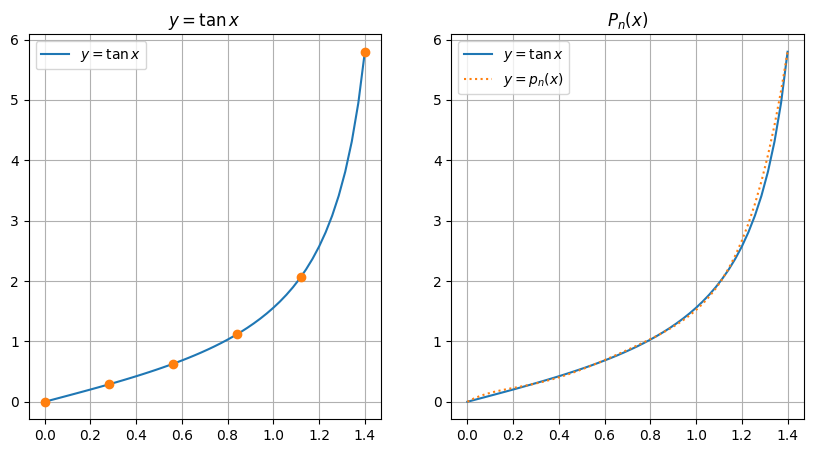

In [ ]:
#Tu codigo de interpolacion de polinomio de grado n
def n_interp(x,A):
  X=A[:,0] # Sacamos las columnas de las x's
  Y=A[:,1] #Sacamos las columnas de las y's
  Lk=[] # aquí guardo los polinomios de Lagrange
  n=len(X)
  for i in range(n): #indice lento
    l=1
    for k in range(n): #indice rapido
      if k!=i: #Los indices siempre son diferentes, si son iguales da 0
        l*=(x-X[k])/(X[i]-X[k])
    Lk.append(l)
  polinomio=0.0
  for i in range(n):
    polinomio+=Lk[i]*Y[i]
  return polinomio


n=6 #numero de la interpolacion
X2=np.linspace(0, 1.4,n) #Nos da un intervalo espaciado entre 0 y 1.4
Y2 = np.tan(X2)
A2=list(zip(X2,Y2)) #'zip' hace una lista de listas y las asocia de forma biyectiva (de uno a uno), x2[0],y2[0]-...
A2=np.array(A2)
valor_num=n_interp(1.3,A2)
valor_teo=np.tan(1.3)
print(valor_teo,valor_num)
error_p=(abs(valor_teo-valor_num)/valor_teo)*100
print(error_p)

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))
xr = np.linspace(0, 1.4)
ax1.plot(xr, np.tan(xr), label=r"$y = \tan x$")
ax1.plot(X2, Y2, "o")
ax1.set_title(r"$y = \tan x$")
ax1.legend()
ax1.grid()

xr =np.linspace(0, 1.4) # np.linspace(1.08, 1.22)
yr = np.tan(xr)
ax2.set_title(r"$P_n(x)$")
ax2.plot(xr, np.tan(xr), label=r"$y = \tan x$")
ax2.plot(xr, n_interp(xr,A2), ":", label=r"$y = p_n(x)$")
ax2.legend()
ax2.grid()

# Diferencias Divididas

Si usamos los polinomios interpoladores de Lagrange, uno de los inconvenientes es que no hay relación de recursión entre la construcción de $P_{n-1}(x)$ y $P_{n}(x)$; cada polinomio debe construirse individualmente y el trabajo necesario para calcular polinomios de grado elevado requiere hacer muchas operaciones.


## Diferencias divididas de orden 1

Para una función $f$ y dos puntos distintos $x_0$ y $x_1$ tenemos:

$$a_0=P_n(x_0)=f(x_0)=f[x_0]$$

es *la diferencia dividida de orden cero*.

Para $a_1$, usamos $P_n(x_1)=f(x_1)=f(x_0)+a_1(x_1-x_0)$, tal que
$$ a_1 = \frac{f(x_1) - f(x_0)}{x_1 - x_0} = f[x_0, x_1] $$
Es la *diferencia dividida de orden 1*.

Usando el teorema del valor medio:
$$ f(x_1) - f(x_0) = f'(c) (x_1 - x_0) $$
existe algún $c$ entre $x_0$ y $x_1$. Entonces
$$ f[x_0, x_1] = f'(c). $$

La diferencia dividida coincide con ser la derivada, en particular para cuando $x_0$ y $x_1$ están muy cerca.
$$ f'\left(\frac{x_0 + x_1}{2}\right) \approx f[x_0, x_1] $$.

## Diferencias divididas de orden 2

Para tres puntos $x_0$, $x_1$ y $x_2$ definimos
$$ f[x_0, x_1, x_2] = \frac{f[x_1, x_2] - f[x_0, x_1]}{x_2 - x_0} $$
Es la *diferencia dividida de orden 2*.

Con un argumento análogo y un poco más complicado que el anterior, se puede demostrar que
$$ f[x_0, x_1, x_2] = \frac{1}{2} f''(c) $$
para un $c$ entre  $x_0$, $x_1$ y $x_2$.

Se obtiene que:
$$  f''(x_1) \approx 2 f[x_0, x_1, x_2] $$
con puntos o nodos equidistantes
$$ x_1 - x_0 = x_2 - x_1 $$

## Diferencias divididas en general

Definimos
$$ f[x_0, \dots, x_n] = \frac{f[x_1, \dots, x_n] - f[x_0, \dots, x_{n-1}]}{(x_n - x_0)} $$
con $n + 1$ puntos distintos $x_0, x_1, \dots, x_n$ con $n \geq 2$,

Podemos plantear la definicón recursiva para la *diferencia dividida del orden $n$* de $f(x)$, en términos de la derivada:
$$ f[x_0, \dots, x_n] = \frac{1}{n!}f^{(n)}(c)$$
para una $c$ en el intervalo $I$ de
$$ I = [\min\{x_0, \dots, x_n\}, \max\{x_0, \dots, x_n\}] $$

Nota: Utilizamos la notación
$ D^k f(x_i) := f[x_i, \dots, x_{i+k}]$

## Forma de Newton: Polinomio de diferencias divididas

Usando las diferencias divididas, el polinomio de la interpolación queda:
\begin{align}
P_1(x) &= f(x_0) + f[x_0, x_1](x - x_0)\\
P_2(x) &= f(x_0) + f[x_0, x_1](x - x_0)\\
  &\qquad {} + f[x_0, x_1, x_2](x - x_0) (x - x_1)\\
  &= P_1(x)  + f[x_0, x_1, x_2](x - x_0) (x - x_1)\\
\end{align}
Generalizando:
\begin{gather}
\deg(P_n) \le n\\
P(x_i) = y_i, \qquad i = 0, 1, \dots, n
\end{gather}
obtenemos
\begin{align}
P_n(x) &= f(x_0) + f[x_0, x_1](x - x_0)\\
  &\qquad {} + f[x_0, x_1, x_2](x - x_0) (x - x_1)\\
  &\qquad {} + f[x_0, x_1, x_2, x_3](x - x_0) (x - x_1) (x - x_2)\\
  & \qquad {} + \dots\\
  &\qquad {} + f[x_0, \dots, x_n](x - x_0) \dots (x - x_{n - 1})\\
\end{align}
Nos da la relación de recursión
$$
P_n(x) = P_{n - 1}(x) + f[x_0, \dots, x_n](x - x_0) \dots (x - x_{n - 1})
$$
donde $P_{n - 1}(x)$ interpola $f(x)$ en los puntos en $\{x_1, \dots, x_{n - 1}\}$

### Ejemplo

Determina la tabla de diferencias divididas para la función $\cos(x)$ con los nodos $x=0,1,2,3,4$

In [ ]:
##Tabla de diferencias divididas
from itertools import zip_longest
X3 = [i for i in range(5)]
f_0 = [np.cos(X3[i]) for i in range(5)]
f_i = [(f_0[i+1] - f_0[i]) / (X3[i+1] - X3[i]) for i in range(4)]
f_ii = [(f_i[i+1] - f_i[i]) / (X3[i+2] - X3[i]) for i in range(3)]
f_iii = [(f_ii[i+1] - f_ii[i]) / (X3[i+3] - X3[i]) for i in range(2)]
f_iiii = [(f_iii[i+1] - f_iii[i]) / (X3[i+4] - X3[i]) for i in range(1)]

#print(list(zip_longest(f_i, f_ii, f_iii, f_iiii, f_iiiii))) #cuando no tiene elemento que representar pone None, que pandas lo representa como NAN
ffdat = pd.DataFrame(list(zip_longest(f_0, f_i, f_ii, f_iii, f_iiii)),
          index=range(5), columns=[r"$f(x_i)$", "$Df(x_i)$", "$D^2 f(x_i)$", "$D^3 f(x_i)$", "$D^4 f(x_i)$"])

ffdat

,$f(x_i)$,$Df(x_i)$,$D^2 f(x_i)$,$D^3 f(x_i)$,$D^4 f(x_i)$
0,1.000000,-0.459698,-0.248376,0.146559,-0.014657
1,0.540302,-0.956449,0.191302,0.087932,NaN
2,-0.416147,-0.573846,0.455097,NaN,NaN
3,-0.989992,0.336349,NaN,NaN,NaN
4,-0.653644,NaN,NaN,NaN,NaN


Obtenemos
\begin{align}
P_1(x) &= 1.0 - 0.459698 (x - 1)\\
P_2(x) &= P_1(x) - 0.248376 (x - 1) (x - 2)\\
P_3(x) &= P_2(x) + 0.146559 (x - 1) (x - 2) (x - 3)\\
P_4(x) &= P_3(x) - 0.014657 (x - 1) (x - 2) (x - 3) (x - 4)\\
\end{align}

In [ ]:
x = 1.05
exacto = np.cos(x)

P = {}
# Extrar el primer renglon de la tabla iloc vive en pandas
r0 = ffdat.iloc(0)[0]

P[1] = r0[0] + r0[1] * (x - 1)
P[2] = P[1] + r0[2] * (x - 1) * (x - 2)
P[3] = P[2] + r0[3] * (x - 1) * (x - 2) * (x - 3)
P[4] = P[3] + r0[4] * (x - 1) * (x - 2) * (x - 3) * (x - 4)

PE = dict([(i, exacto - P[i]) for i in range(1, 5)])
pd.DataFrame([P,PE], index=["$P_n(x)$", "Error"])

,1,2,3,4
$P_n(x)$,0.977015,0.988813,1.002388,1.006393
Error,-0.479444,-0.491242,-0.504817,-0.508822


### Nota
Por unicidad, se sabe que el polinomio que interpola $f(x)$ entre $n$ puntos $x_i$ es único. Entonces, los métodos de Lagrange y Newton encuentran el mismo polinomio. Las ventajas de los polinomios de Newton son:
- Se puede encontrar un polinomio de mayor orden sin tener que re-hacer el polinomio completo (usamos recursividad).
- Es más fácil estimar el error de interpolación usando polinomios de Newton.

### Solución única?

Suponemos que exista $Q(x)$ con $\mathrm{deg} (Q) \le 2$ y
$$ Q(x_i) = y_i, \qquad i=1, 2, 3 $$
Definimos
$$ R(x) = P_2(x) - Q(x) $$
que tiene que tener $\deg(R) \le 2$. Además
$$ R(x_i) = P_2(x_i) - Q(x_i) = y_i - y_i = 0 $$
El único polinomio de grado 2 con 3 ceros distintos es el cero-polinomio
$$ R(x) = 0 $$
Entonces tenemos
$$ Q(x) = P_2(x) $$ **QED**

# Interpolación con intervalos
Con la interpolación de Lagrange y Newton hemos interpolado todos los nodos con un polinomio. Ahora modificaremos esto, haciendo más precisa la interpolación.

Aproximaremos con una función distinta, entre punto por punto, es decir, a cada dos nodos los aproximaremos con su propio polinomio y repetiremos para los nodos dados, teniendo n-1 polinomios distintos. A esto es a lo que le llamamos *Interpolación por intervalos*

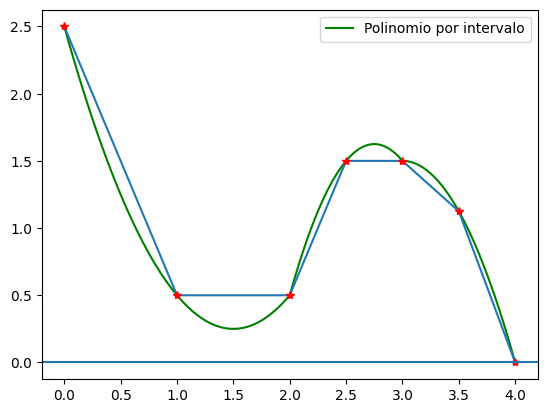

In [ ]:
from scipy.interpolate import lagrange

datx = [0, 1, 2, 2.5, 3, 3.5, 4]
daty = [2.5, 0.5, 0.5, 1.5, 1.5, 1.125, 0]
dat_intervalos = [(np.linspace(datx[2*i], datx[2*i + 2]),
                   lagrange(datx[2*i:2*i+3], daty[2*i:2*i+3]) )
                  for i in range((len(datx) - 1) // 2) ]

l = {"label": "Polinomio por intervalo"}
for xr_sub, poly in dat_intervalos:
    plt.plot(xr_sub, poly(xr_sub), "g", **l)
    l = {}

plt.plot(datx, daty)
plt.plot(datx, daty, "r*")
plt.axhline()
plt.legend();

La interpolación por intervalos también se llama interpolación por Splines

## Spline cúbico
Tenemos un conjunto de puntos $\{x_i\}$ con
$$
a \leq x_1 \leq x_2 \leq \dots \leq x_n \leq b
$$
para unos $a$ y $b$ fijos. En muchos casos usamos $[a, b] = [x_1, x_n]$. Un *spline cúbico* $s(x)$ en $[a, b]$ con nodos $\{x_i\}$ tiene las propiedades:
1. En los intervalos
  $$
  [a, x_1], [x_1, x_2], \dots, [x_{n-1}, x_n], [x_n, b]
  $$
  $s(x)$ es polinomio de grado $\leq 3$.
2. $s(x)$, $s'(x)$, $s''(x)$ son continuos en $[a, b]$.

Con $(x_1, y_1), \dots, (x_n, y_n)$. Llamamos a $s(x)$ como *spline cúbico interpolante* cuando
$$
s(x_i) = y_i, \qquad, i = 1, \dots, n
$$


En este caso, cada polinomio $P(x)$ a través del que construimos los Splines en [m,n] tiene grado 3. Esto quiere decir, que va a tener la forma $$P(x)=ax^{3}+bx^{2}+cx+d$$.

En este caso vamos a tener cuatro incógnitas por cada intervalo $(a,b,c,d)$, y una nueva condición para cada punto común a dos intervalos, respecto a la segunda derivada, implicando:

1. Que las partes de la función a trozos $P(x)$ pasen por ese punto. Es decir, que las dos $P_{n}(x)$ que rodean al $f(x)$ que queremos aproximar, sean igual a la función en cada uno de estos puntos.
2. Que la derivada en un punto siempre coincida para ambos "lados" de la función definida a trozos que pasa por tal punto común.
3. Que la segunda derivada en un punto siempre coincida para ambos "lados" de la función definida a trozos que pasa por tal punto común.

Como puede deducirse al compararlo con el caso de polinomios cuadráticos, ahora no nos va a faltar una sino dos ecuaciones (condiciones) para el número de incógnitas que tenemos. La forma de solucionar esto, determina el carácter de los splines cúbicos. Por lo que definimos:

1. Splines cúbicos naturales: La forma más típica. La derivada segunda de $P$ se hace 0 para el primer y último punto sobre el que está definido el conjunto de Splines, esto son, los puntos $m$ y $n$ en el intervalo [m,n]. También se requiere dar los valores de la segunda derivada de $m$ y $n$ de forma *manual*,  en el conjunto de splines definidos en el intervalo [m,n]. Hacer iguales los valores de la segunda derivada segunda de $m$ y $n$ en el conjunto de splines definidos en el intervalo [m,n].

2. Splines cúbicos sujetos: La primera derivada de $P$ debe tener el mismo valor que la primera derivada de la función para el primer y último punto sobre el que está definido el conjunto de Splines, esto son, los puntos m y n en el intervalo [m,n].

### Condiciones de frontera naturales

$$
s''(x_1) = 0, \qquad s''(x_n) = 0
$$

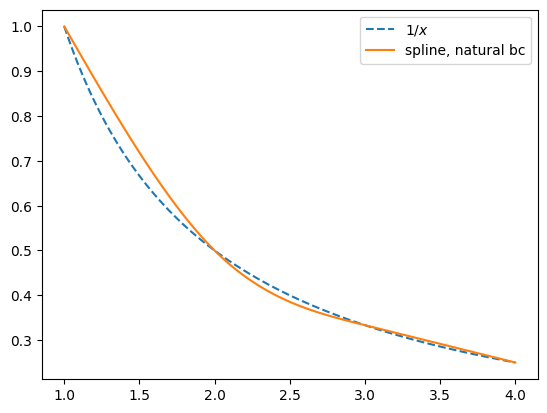

In [ ]:
from scipy.interpolate import CubicSpline #usar scipy si queremos usar funciones especiales
inv_x = np.linspace(1, 4, 4)
inv_y = 1/inv_x
inv_nat = CubicSpline(inv_x, inv_y, bc_type="natural") # en bc_type definimos la curvatura
inv_xr = np.linspace(1, 4, 100)

plt.plot(inv_xr, 1/inv_xr, "--", label="$1/x$")
plt.plot(inv_xr, inv_nat(inv_xr), label="spline, natural bc");
plt.legend();

# Condiciones de frontera: Splines cúbicos sujetos a la misma curvatura

$$
s''(x_1) = y''_1, \qquad s''(x_n) = y''_n
$$

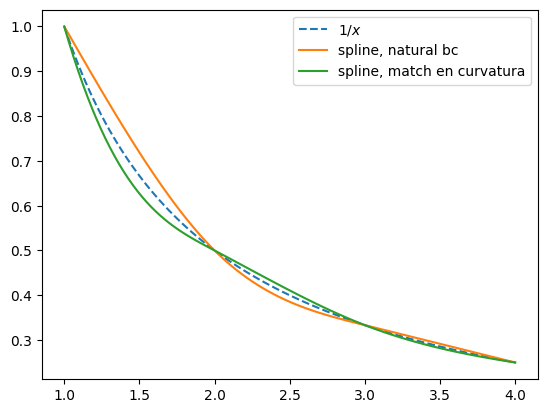

In [ ]:
inv_curv = CubicSpline(inv_x, inv_y, bc_type=((2, 2), (2, 1/32)))
# plot

plt.plot(inv_xr, 1/inv_xr, "--", label="$1/x$")
plt.plot(inv_xr, inv_nat(inv_xr), label="spline, natural bc");
plt.plot(inv_xr, inv_curv(inv_xr), label="spline, match en curvatura");
plt.legend();